In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

In [2]:
from gurobipy import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# L = 35

In [4]:
p1_35 = Model ("p1_L=35")


Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-15


In [5]:
L = 35
#25 / 35

In [6]:
x = {}
y = {}
for i in range(4):
    x[i] = p1_35.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = "x"+ str(i+1))
    y[i] = p1_35.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = "y"+ str(i+1))

In [7]:
p1_35.setObjective(y[0] + y[1] + y[2] + y[3], GRB.MINIMIZE)

In [8]:
p1_35.addConstr(x[len(x)-1] <= 100, "width constraint between x4 and right point")
for i in range(3):
    print(i)
    p1_35.addConstr(x[i] <= x[i+1], "width constraint between" + str(i+1) + " , ", str(i+2))

0
1
2


In [9]:
p1_35.addConstr(pow(x[0],2) + pow((y[0]-100),2) == pow(L,2), "distance constraint between x1 and left point")


<gurobi.QConstr Not Yet Added>

In [10]:
for i in range(3):
    p1_35.addConstr(pow(x[i]-x[i+1], 2) + pow(y[i]-y[i+1], 2) == pow(L,2), "height constraint between" + str(i+1) + " , ", str(i+2))

In [11]:
p1_35.addConstr(pow(x[len(x)-1]-100, 2) + pow(y[len(y)-1]-150, 2) == pow(L,2), "height constraint between x4 and right point")

<gurobi.QConstr Not Yet Added>

In [12]:
p1_35.update()

In [13]:
p1_35.Params.NonConvex = 2

Set parameter NonConvex to value 2


In [14]:
p1_35.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 8 columns and 7 nonzeros
Model fingerprint: 0x578588a4
Model has 5 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [2e+02, 3e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
  QRHS range       [1e+03, 3e+04]
Presolve removed 1 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 56 rows, 22 columns, 125 nonzeros
Presolved model has 14 bilinear constraint(s)
Variable types: 22 continuous, 0 integer (0 binary)

Root relaxation: objective 1.562448e+02, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf

In [15]:
ans = {}
for var in p1_35.getVars():
    print(var.varName, " = ", var.x) 
    ans[var.varName] = var.x
print("objective value =", p1_35.objVal)


x1  =  18.364168696515847
y1  =  70.2047435304559
x2  =  51.72203519386264
y2  =  59.60980404288967
x3  =  76.62919367795483
y3  =  84.19909960515244
x4  =  90.62507465364659
y4  =  116.27892684462284
objective value = 330.2925740231209


In [16]:
for i in range(3):
    val = pow(ans['x'+str(i+1)] - ans['x'+str(i+2)], 2) + pow(ans['y'+str(i+1)] - ans['y'+str(i+2)], 2)
    print(val)

1225.0000000000016
1225.0000000000014
1224.999999999998


In [17]:
x_graph = []
y_graph = []
x_graph.append(0)
y_graph.append(100)

In [18]:
for i in range(3):
    val = pow(ans['x'+str(i+1)] - ans['x'+str(i+2)], 2) + pow(ans['y'+str(i+1)] - ans['y'+str(i+2)], 2)
    print(val)
    x_graph.append(ans['x'+str(i+1)])
    y_graph.append(ans['y'+str(i+1)])

1225.0000000000016
1225.0000000000014
1224.999999999998


In [19]:
x_graph.append(ans['x4'])
y_graph.append(ans['y4'])
x_graph.append(100)
y_graph.append(150)

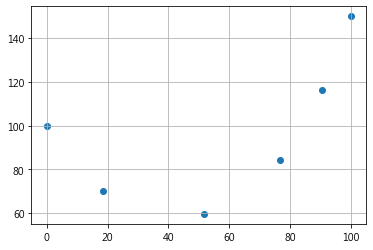

In [20]:
x = np.array(x_graph)
y = np.array(y_graph)

fig = plt.figure()
ax = fig.gca()
plt.scatter(x, y)
plt.grid()
plt.show()


# L = 25

In [21]:
p1_25 = Model ("p1_L=25")


In [22]:
L = 25
#25 / 35

In [23]:
x = {}
y = {}
for i in range(4):
    x[i] = p1_25.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = "x"+ str(i+1))
    y[i] = p1_25.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = "y"+ str(i+1))

In [24]:
p1_25.setObjective(y[0] + y[1] + y[2] + y[3], GRB.MINIMIZE)

In [25]:
p1_25.addConstr(x[len(x)-1] <= 100, "width constraint between x4 and right point")
for i in range(3):
    print(i)
    p1_25.addConstr(x[i] <= x[i+1], "width constraint between" + str(i+1) + " , ", str(i+2))

0
1
2


In [26]:
p1_25.addConstr(pow(x[0],2) + pow((y[0]-100),2) == pow(L,2), "distance constraint between x1 and left point")


<gurobi.QConstr Not Yet Added>

In [27]:
for i in range(3):
    p1_25.addConstr(pow(x[i]-x[i+1], 2) + pow(y[i]-y[i+1], 2) == pow(L,2), "height constraint between" + str(i+1) + " , ", str(i+2))

In [28]:
p1_25.addConstr(pow(x[len(x)-1]-100, 2) + pow(y[len(y)-1]-150, 2) == pow(L,2), "height constraint between x4 and right point")

<gurobi.QConstr Not Yet Added>

In [29]:
p1_25.update()

In [30]:
p1_25.Params.NonConvex = 2

Set parameter NonConvex to value 2


In [31]:
p1_25.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 8 columns and 7 nonzeros
Model fingerprint: 0x5d667a89
Model has 5 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [2e+02, 3e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
  QRHS range       [6e+02, 3e+04]
Presolve removed 1 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 56 rows, 22 columns, 125 nonzeros
Presolved model has 14 bilinear constraint(s)
Variable types: 22 continuous, 0 integer (0 binary)

Root relaxation: objective 1.704295e+02, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf

In [32]:

ans = {}
for var in p1_25.getVars():
    print(var.varName, " = ", var.x) 
    ans[var.varName] = var.x
print("objective value =", p1_25.objVal)


x1  =  23.965112240295337
y1  =  92.88147520127616
x2  =  48.61691815093399
y2  =  97.03941523742402
x3  =  69.7274922072922
y3  =  110.43134052884551
x4  =  86.5436906904659
y4  =  128.93040722353322
objective value = 429.2826381910789


In [33]:
x_graph = []
y_graph = []
x_graph.append(0)
y_graph.append(100)

In [34]:
for i in range(3):
    val = pow(ans['x'+str(i+1)] - ans['x'+str(i+2)], 2) + pow(ans['y'+str(i+1)] - ans['y'+str(i+2)], 2)
    print(val)
    x_graph.append(ans['x'+str(i+1)])
    y_graph.append(ans['y'+str(i+1)])

625.0000000000002
624.9999999999987
624.9999999999975


In [35]:
x_graph.append(ans['x4'])
y_graph.append(ans['y4'])
x_graph.append(100)
y_graph.append(150)

In [36]:
x_graph

[0,
 23.965112240295337,
 48.61691815093399,
 69.7274922072922,
 86.5436906904659,
 100]

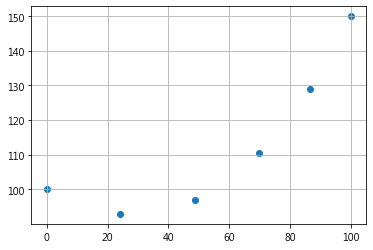

In [37]:
x = np.array(x_graph)
y = np.array(y_graph)

fig = plt.figure()
ax = fig.gca()
plt.scatter(x, y)
plt.grid()
plt.show()
